In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

<Axes: >

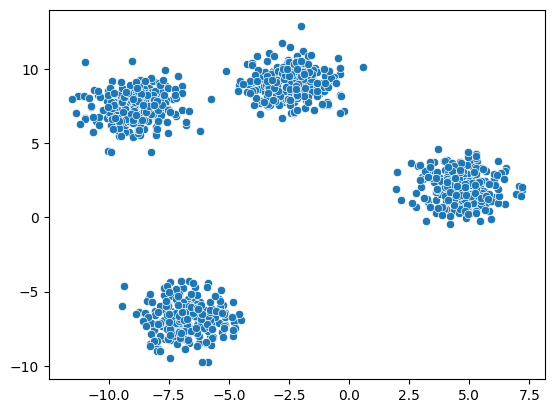

In [5]:
# Visualize
# sns.scatterplot(x=X[:,0],y=X[:,1], c=y)
sns.scatterplot(x=X[:,0],y=X[:,1])

In [6]:
# K-Means Clustering

from sklearn.cluster import KMeans

In [7]:
K = 4

kmeans = KMeans(
    n_clusters = K,
    random_state =42
)

In [8]:
labels = kmeans.fit_predict(X)
# label = cluster number

<Axes: >

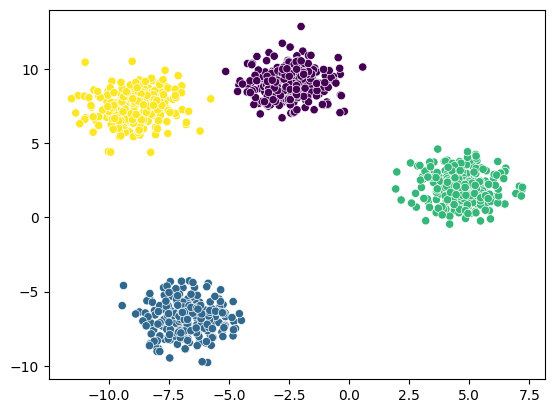

In [9]:
sns.scatterplot(x=X[:,0],y=X[:,1], c=labels)

### choose our k values - elbow, slihouette score

In [11]:
# Elbow Method

wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

<Axes: >

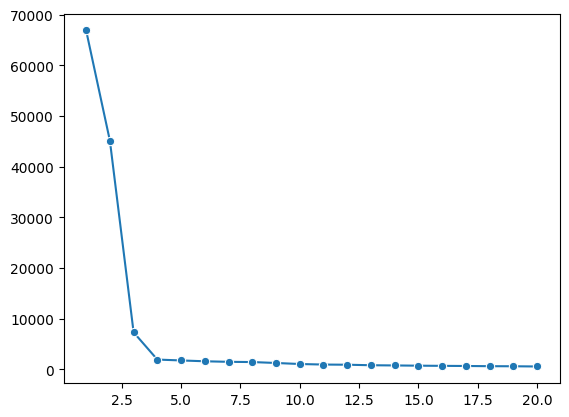

In [15]:
sns.lineplot(x=range(1,21), y=wcss, marker="o")

# also there is a way to automatically calculate the value of k 

# Using Kneed module

In [16]:
!pip install kneed


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from kneed import KneeLocator

In [18]:
knee = KneeLocator(range(1,21), wcss, curve="convex", direction="decreasing")

In [19]:
print("Optimal K -  ", knee.elbow)

Optimal K -   4


### Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score

In [22]:
ss = []

for k in range(2, 22):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    ss.append(score)

<Axes: >

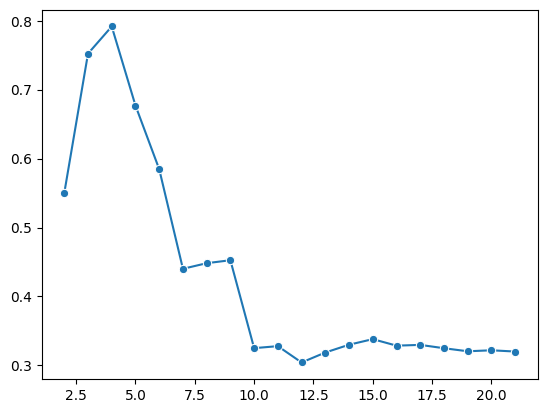

In [ ]:
sns.lineplot(x=range(2,22), y=ss, marker="o")